In [1]:
%load_ext autoreload
%autoreload 2
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
from utils.EchoDynamicDataset import EchoDynamicDataset
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from experiments.image.ae_experiment import AutoEncoderExperiment
from experiments.image.vae_experiment import VAEExperiment
from experiments.video.trajectory_experiment import TrajectoryExperiment
from experiments.video.trajectory_vae_experiment import TrajectoryVAEExperiment
from matplotlib import pyplot as plt

/software/dummy_venv/lib/python3.9/site-packages/pytorch_lightning/metrics/__init__.py:43: LightningDeprecationWarning: `pytorch_lightning.metrics.*` module has been renamed to `torchmetrics.*` and split off to its own package (https://github.com/PyTorchLightning/metrics) since v1.3 and will be removed in v1.5
  rank_zero_deprecation(


In [3]:
data_dir = '/datasets/EchoNet-Dynamic'
cache_dir = '/scratch/echo_cache'

In [4]:
def get_batch(dataset):
    return next(iter(DataLoader(dataset,shuffle = True, batch_size=9)))[0]

In [5]:
def visualize(orig, rec):
    f, ax = plt.subplots(1,2,dpi=300)
    ax[0].imshow(make_grid(orig,nrow=3).permute(1,2,0))
    ax[0].set_title('Original')
    ax[1].imshow(make_grid(rec,nrow=3).permute(1,2,0))
    ax[1].set_title('Reconstruction')
    for i in range(2):
        ax[i].set_xticks([])
        ax[i].set_yticks([])

# Image models

## Get Echodynamic image dataset

In [6]:
dataset = EchoDynamicDataset(data_dir,frames=None,cache_dir=cache_dir)

## Get AutoEncoder reconstruction

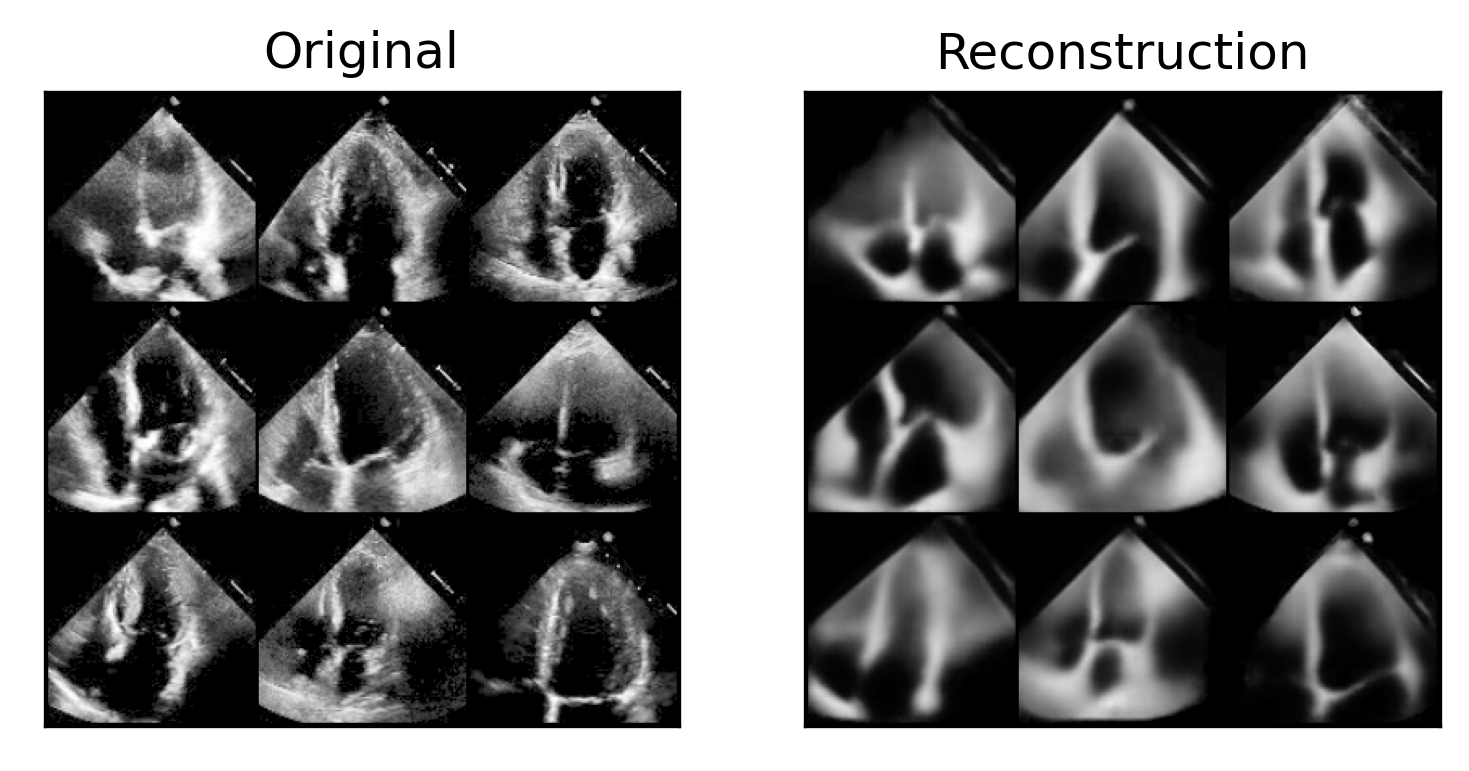

In [7]:
model = AutoEncoderExperiment(pretrain=True, augment=True)
data = get_batch(dataset)
rec = model.inference(data)[1]
visualize(data, rec)

## Get VariationalAutoEncoder reconstruction

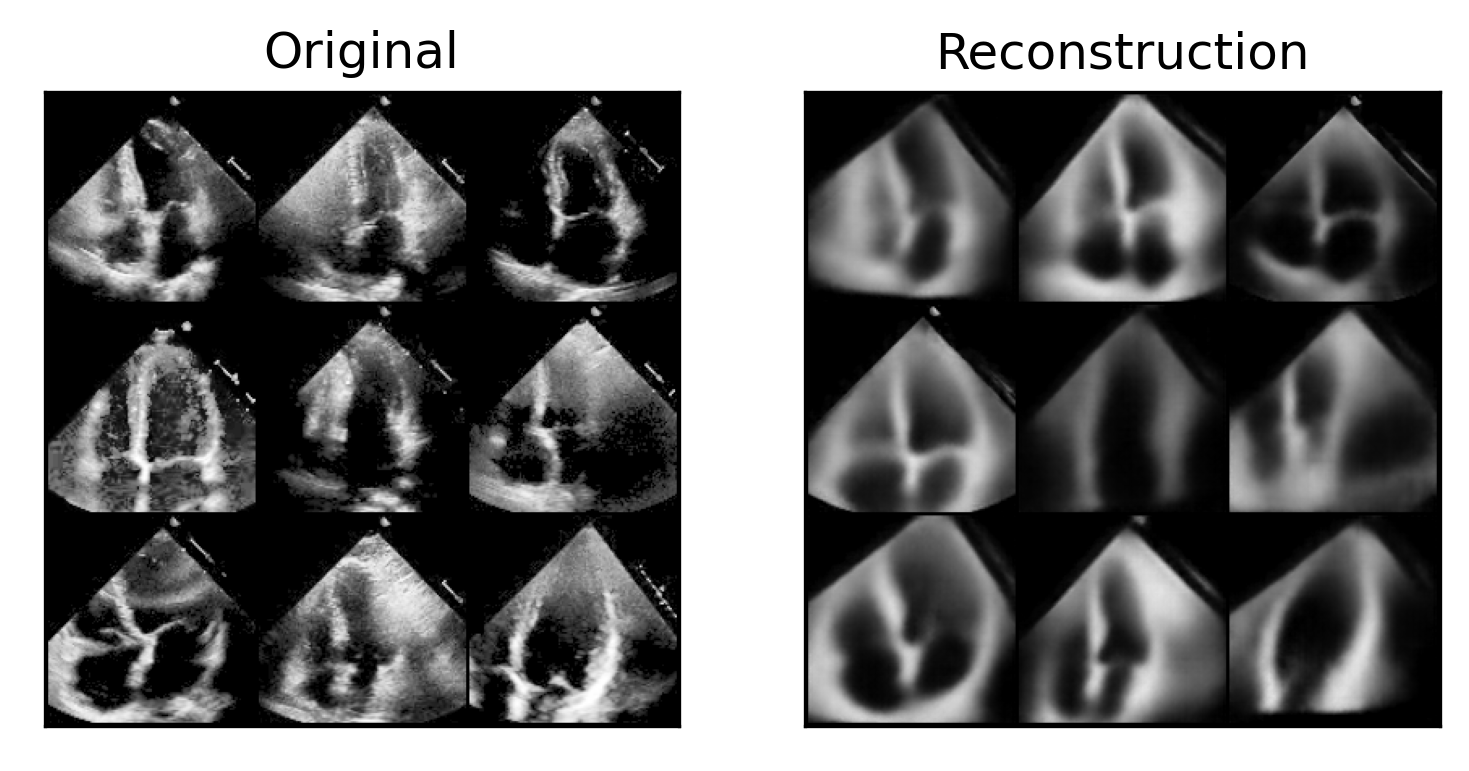

In [8]:
model = VAEExperiment(pretrain=True)
data = get_batch(dataset)
rec = model(data)[0][0]
visualize(data, rec)

## Get Echodynamic video dataset

In [9]:
dataset = EchoDynamicDataset(data_dir,frames=25,cache_dir=cache_dir)

In [10]:
trajectory = 'spiral'

## Get TAE reconstruction

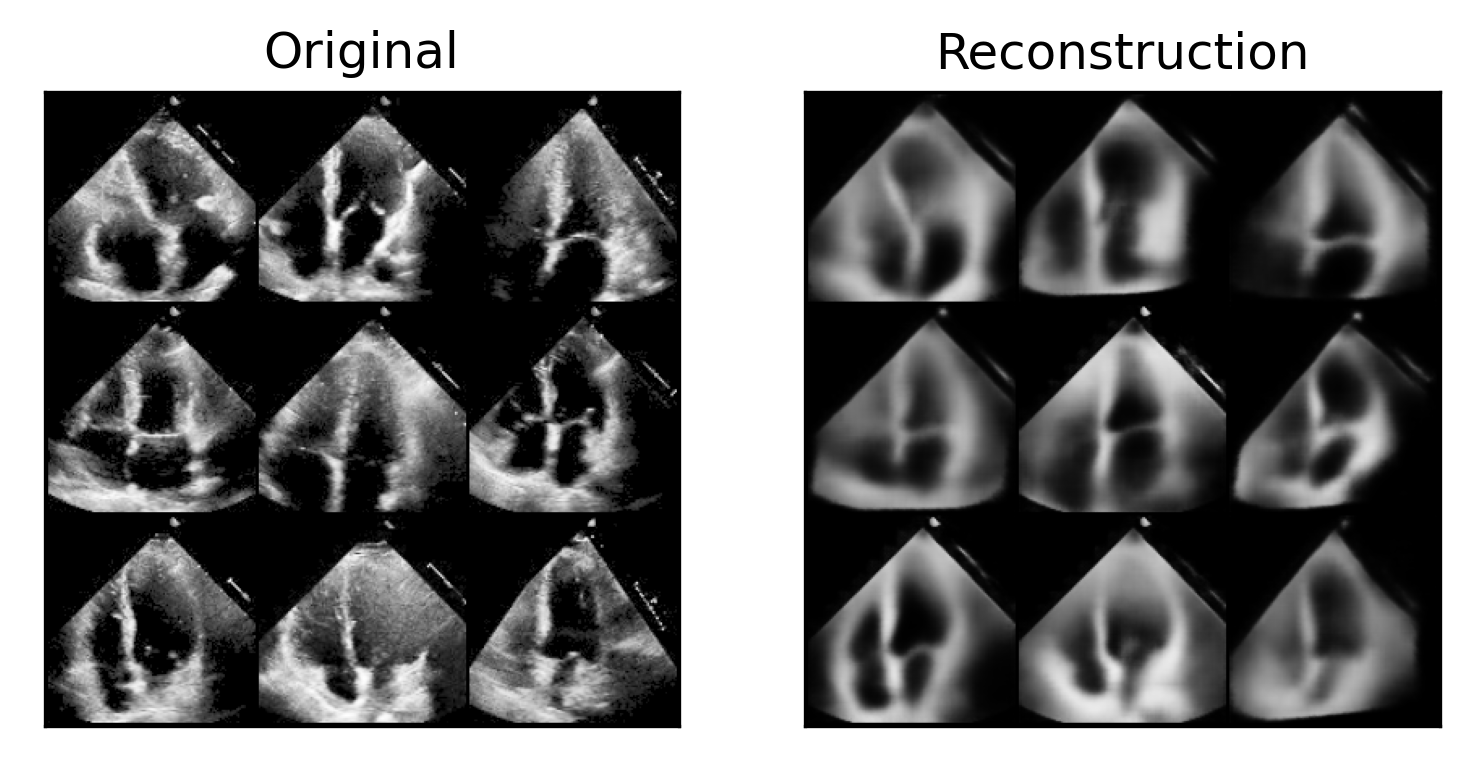

In [11]:
model = TrajectoryExperiment(pretrain=True, traj_func=trajectory)
data = get_batch(dataset)
rec = model.inference(data)[1]
data = data[:,12::25].squeeze(1)
rec = rec[:,12::25].squeeze(1)
visualize(data, rec)

## Get TVAE reconstruction

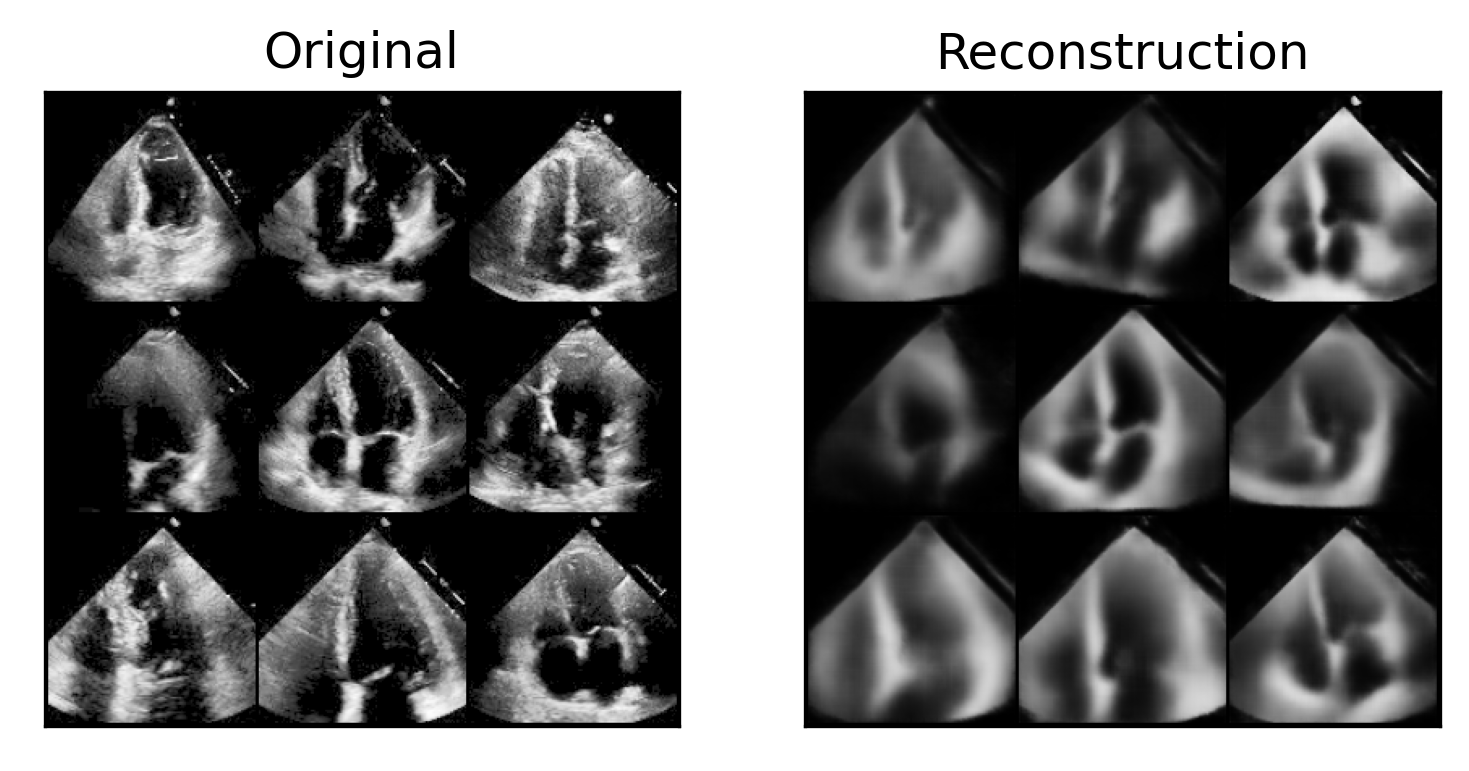

In [12]:
model = TrajectoryVAEExperiment(pretrain=True, traj_func=trajectory)
data = get_batch(dataset)
rec = model.inference(data)[1]
data = data[:,12::25].squeeze(1)
rec = rec[:,12::25].squeeze(1)
visualize(data, rec)